## Classifier  approach
---
This approach assumes that quantifiers are learned as a group and that essentially each q quantifier example is a negative example for all other quantifiers q'.

The classifier is in effect a solver for which q makes the sentence "Q as are bs" most likely given an input scene s.

This enables us to use not only the quantifier quantify evaluation methods but the classifier in order to generate a teacher-student scheme.

## Imports

### my class imports

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from quants.quantifiers import *
from quants.models import Classifier

Using TensorFlow backend.


### Global imports

In [5]:
import numpy as np
import pandas as pd

### keras and TF imports

In [6]:
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)

import keras

from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Embedding, Dense, Conv1D, Input, Bidirectional, RepeatVector, Dropout, LeakyReLU, Flatten
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import SGD, Adam

TensorFlow version:  2.2.0


In [7]:
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
print("Keras backend: ", tf.python.keras.backend.backend())
tf.python.keras.backend.set_session(sess)
tf.config.list_logical_devices()


Keras backend:  tensorflow


[LogicalDevice(name='/device:CPU:0', device_type='CPU'),
 LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU'),
 LogicalDevice(name='/device:XLA_GPU:0', device_type='XLA_GPU'),
 LogicalDevice(name='/device:GPU:0', device_type='GPU')]

### Classifier models

In [8]:
class DDNNClassifier(Classifier):
    """ deep dense classifier model builder method """
    
    def build(self):
        model= Sequential()
        model.add(Dense(Quantifier.scene_len, activation="relu", name="input"))
        model.add(Dropout(0.25, name="dropout_1"))
        model.add(Dense(100, activation="relu", name="dense_2"))
        model.add(Dropout(0.25, name="dropout_2"))
        model.add(Dense(50, activation="relu", name="dense_3"))
        model.add(Dropout(0.25, name="dropout_3"))
        model.add(Dense(len(self._quantifiers), activation='softmax', name="softmax_1"))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(),
                                                                                  tf.keras.metrics.Recall()])
        return model

In [9]:
class DNNClassifier(Classifier):
    """ dense classifier model builder method """
    
    def build(self):
        model= Sequential()
        model.add(Dense(Quantifier.scene_len, activation="relu", name="input"))
        model.add(Dropout(0.5, name="dropout_1"))
        model.add(Dense(len(self._quantifiers), activation='softmax', name="softmax_1"))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(),
                                                                                  tf.keras.metrics.Recall()])
        return model

In [42]:
from tensorflow.keras import initializers
from keras.utils import np_utils

class CNNClassifier(Classifier):
    """ Convolutional classifier model builder method """

    def build(self):
        model = Sequential()
        model.add(Conv1D(filters=2, kernel_size=1,
                         use_bias=False,
                         input_shape=(Quantifier.scene_len, len(symbols)), name="conv_1"))
        model.add(Dropout(0.25, name="dropout_1"))
        model.add(Flatten())
        model.add(Dense(len(self._quantifiers),
                        kernel_initializer="constant", trainable=False, use_bias=False,
                        activation='softmax', name="softmax_1"))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision(),
                                                                                  tf.keras.metrics.Recall()])
        return model

    def prepare(self, scenes):
        return np_utils.to_categorical(scenes)

## Quantifier sets for learning

In [68]:
All().generate_scenes()

AssertionError: All(scene=Scene generated by quantifier) == False

In [11]:
natural_quantifiers = [The(), Both(), No(), All(), Some(), Most()]

In [12]:
# unnatural_quantifiers = [MinMax(2, 10), MinMax(3, 6), Or([MinMax(2, 5), MinMax(10, 20)])]
unnatural_quantifiers = [MinMax(2, 5), MinMax(8, 10), MinMax(12, 15), MinMax(17, 20), MinMax(24, 30), MinMax(37, 50)]

In [43]:
natural_classifier = CNNClassifier(natural_quantifiers).teach(epochs=15)
# natural_classifier = teach(DNNClassifier(natural_quantifiers), epochs=15, max_len=10)

CNNClassifier model classifies ['All()' 'Both()' 'Most()' 'No()' 'Some()' 'The()']
Epoch 1/15
6000/6000 [==============================] - 1s 133us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 2/15
6000/6000 [==============================] - 1s 124us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 3/15
6000/6000 [==============================] - 1s 125us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 4/15
6000/6000 [==============================] - 1s 122us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 5/15
6000/6000 [==============================] - 1s 122us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 6/15
6000/6000 [==============================] - 1s 123us/step - loss: 1.7918 - precision_15: 0.0000e+00 - recall_15: 0.0000e+00
Epoch 7/15
6000/6000 [==============================] - 1s 117us/step - loss: 1.7918 - precision_15: 

/home/doron/git/research/RESEARCH/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix: 
        All()  Both()  Most()  No()  Some()  The()
All()    1000       0       0     0       0      0
Both()   1000       0       0     0       0      0
Most()   1000       0       0     0       0      0
No()     1000       0       0     0       0      0
Some()   1000       0       0     0       0      0
The()    1000       0       0     0       0      0
Classification report: 
              precision    recall  f1-score   support

       All()     0.1667    1.0000    0.2857      1000
      Both()     0.0000    0.0000    0.0000      1000
      Most()     0.0000    0.0000    0.0000      1000
        No()     0.0000    0.0000    0.0000      1000
      Some()     0.0000    0.0000    0.0000      1000
       The()     0.0000    0.0000    0.0000      1000

    accuracy                         0.1667      6000
   macro avg     0.0278    0.1667    0.0476      6000
weighted avg     0.0278    0.1667    0.0476      6000

Quantifier counts:  [1000]


/home/doron/git/research/RESEARCH/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support:  1000
Accuracy:  0.0


In [36]:
# print(natural_classifier._model.get_layer(name="conv_1").input_shape,
#       natural_classifier._model.get_layer(name="conv_1").output_shape)
# natural_classifier._model.get_layer(name="conv_1").get_weights()
# print(natural_classifier._model.get_layer(name="softmax_1").input_shape,
#       natural_classifier._model.get_layer(name="softmax_1").output_shape)
# natural_classifier._model.get_layer(name="softmax_1").get_weights()

(None, 500, 4) (None, 500, 2)
(None, 1000) (None, 6)


[array([[ 0.1076507 ,  0.13008717, -0.01818368, -0.22356793, -0.00356855,
         -0.00904826],
        [-0.0006467 ,  0.0793877 ,  0.10010331, -0.095723  , -0.1381944 ,
          0.02341199],
        [ 0.09779829,  0.02340156, -0.00931393, -0.06722328,  0.0653357 ,
         -0.04348795],
        ...,
        [ 0.01721711,  0.1114671 , -0.07544132,  0.05401943, -0.07675583,
          0.1960058 ],
        [ 0.15859719, -0.02447802, -0.08564785, -0.07498336, -0.0054255 ,
         -0.02525638],
        [-0.00150776,  0.12157026, -0.02007886,  0.05680544, -0.05764136,
          0.01590555]], dtype=float32),
 array([ 0.26824734, -0.29823148,  1.1078876 , -0.544239  , -0.3411305 ,
        -0.3680084 ], dtype=float32)]

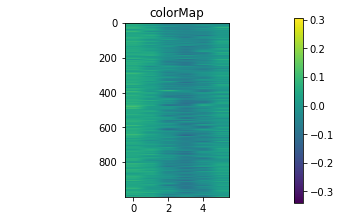

In [37]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(natural_classifier._model.get_layer(name="softmax_1").get_weights()[0])
ax.set_aspect(1 / 100)

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [173]:
# unnatural_classifier = teach(CNNClassifier(unnatural_quantifiers), epochs=50, max_len=10)
unnatural_classifier = DNNClassifier(unnatural_quantifiers).teach, epochs=50, max_len=100)

DNNClassifier model classifies ['MinMax(mini=12,maxi=15)' 'MinMax(mini=17,maxi=20)'
 'MinMax(mini=2,maxi=5)' 'MinMax(mini=24,maxi=30)'
 'MinMax(mini=37,maxi=50)' 'MinMax(mini=8,maxi=10)']
Epoch 1/50
600/600 [==============================] - 0s 404us/step - loss: 3.0381 - precision_38: 0.1388 - recall_38: 0.0970
Epoch 2/50
600/600 [==============================] - 0s 261us/step - loss: 1.8824 - precision_38: 0.1562 - recall_38: 0.0610
Epoch 3/50
600/600 [==============================] - 0s 259us/step - loss: 1.7974 - precision_38: 0.1565 - recall_38: 0.0364
Epoch 4/50
600/600 [==============================] - 0s 258us/step - loss: 1.7813 - precision_38: 0.1570 - recall_38: 0.0259
Epoch 5/50
600/600 [==============================] - 0s 271us/step - loss: 1.7926 - precision_38: 0.1587 - recall_38: 0.0204
Epoch 6/50
600/600 [==============================] - 0s 264us/step - loss: 1.7859 - precision_38: 0.1585 - recall_38: 0.0167
Epoch 7/50
600/600 [==============================] - 0s